In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

Saving building_original.tif to building_original.tif


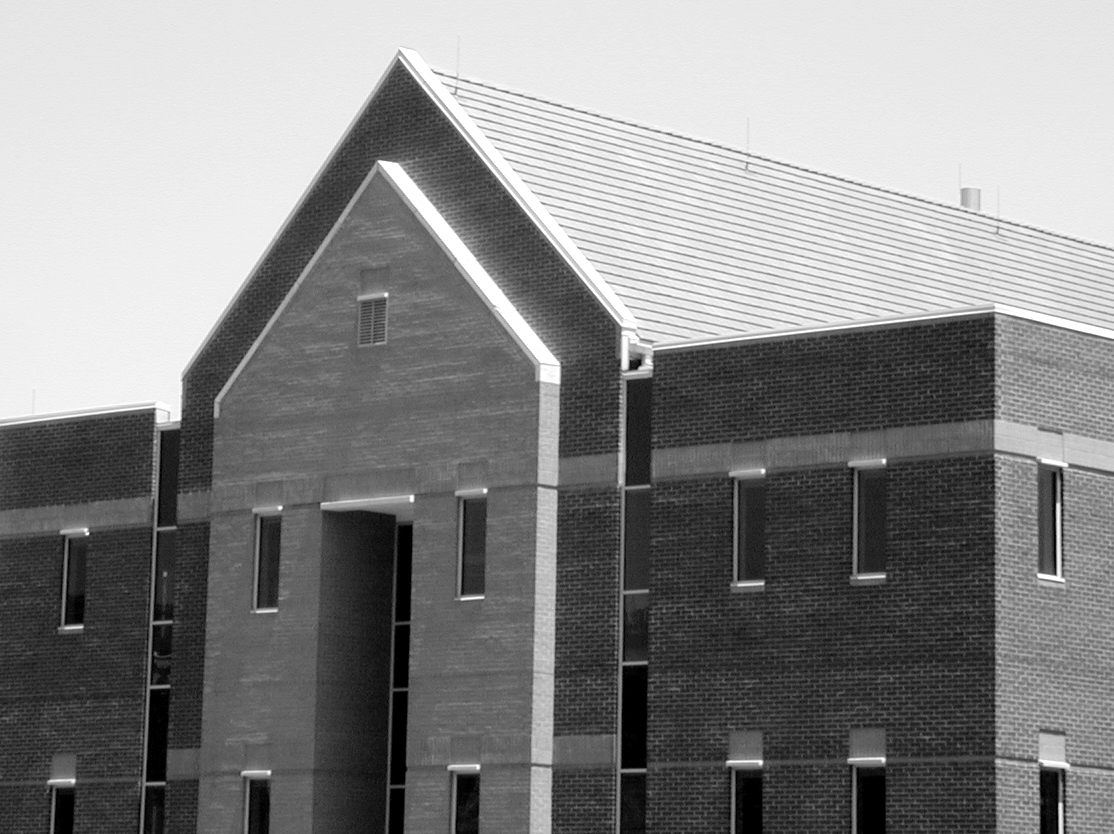

In [2]:
from google.colab import files
myfile = files.upload()

I = cv2.imread('building_original.tif', cv2.IMREAD_GRAYSCALE)

from google.colab.patches import cv2_imshow 
cv2_imshow(I)

In [3]:
# Step2. OpenCV의 GaussianBlur 함수를 이용해 원래 이미지에 blur 처리를 하세요. 

gaussian_blur_I = cv2.GaussianBlur(I,(5,5),5)

In [59]:
# Step3. OpenCV의 Canny함수를 이용해 Edge를 찾으세요.
# Step4. Canny 함수의 apertureSize는 3으로 고정하고 2개의 threshold를 잘 조절해 본인이 생각했을 때 이미지의 삼각형 지붕이 가장 잘 나온 edge를 찾으세요.

I_canny = cv2.Canny(gaussian_blur_I, 170, 100 , apertureSize=3)

# cv2_imshow(I_canny)

In [89]:
#  OpenCV의 HoughLinesP 함수를 이용해 Step4에서 구한 edge에서 삼각형 모양의 지붕 선을 찾아서 원래 이미지에 표시하세요.
I_lines = I.copy()

minLineLength = 10
maxLineGap = 1
thr = 10
lines = cv2.HoughLinesP(I_canny,1,np.pi/180,thr,minLineLength,maxLineGap)

for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(I_lines,(x1,y1),(x2,y2),(0,255,0),2)

# cv2_imshow(I_lines)

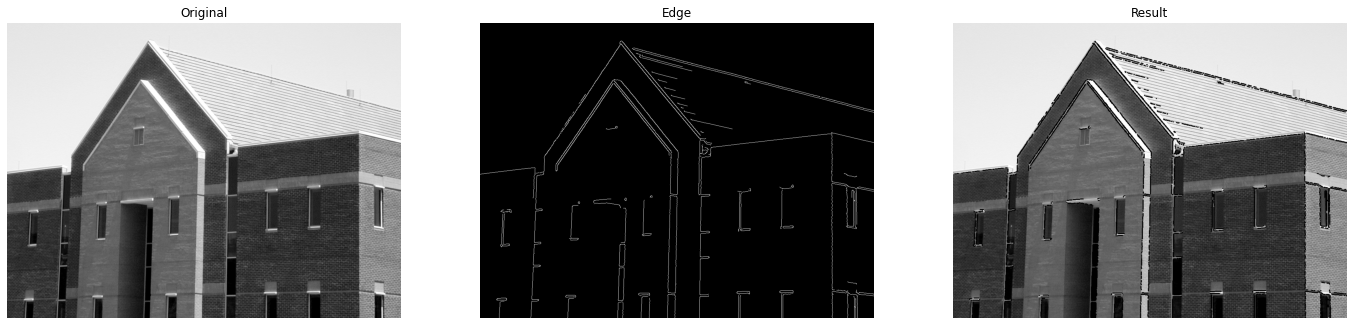

In [90]:
fig = plt.figure(figsize = (24, 8)) 
rows = 1
cols = 3
  
ax1 = fig.add_subplot(rows, cols, 1)
I_RGB = cv2.cvtColor(I, cv2.COLOR_GRAY2RGB)
ax1.imshow(I_RGB)
ax1.set_title('Original')
ax1.axis("off")
 
ax2 = fig.add_subplot(rows, cols, 2)
I_canny_RGB = cv2.cvtColor(I_canny, cv2.COLOR_GRAY2RGB)
ax2.imshow(I_canny_RGB)
ax2.set_title('Edge')
ax2.axis("off")

ax3 = fig.add_subplot(rows, cols, 3)
I_lines_RGB = cv2.cvtColor(I_lines, cv2.COLOR_GRAY2RGB)
ax3.imshow(I_lines_RGB)
ax3.set_title('Result')
ax3.axis("off")

plt.show()